## Spam Or Ham Classifier

### Importing libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [2]:
message = [line.rstrip() for line in open('D:/study/gourabsir/spam or ham/SPAM text message 20170820 - Data.csv')]
print(len(message))

5575


In [3]:
for message_no,message in enumerate(message[:10]):
    print(message_no,message)
    print('\n')

0 Category,Message


1 ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."


2 ham,Ok lar... Joking wif u oni...


3 spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


4 ham,U dun say so early hor... U c already then say...


5 ham,"Nah I don't think he goes to usf, he lives around here though"


6 spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv"


7 ham,Even my brother is not like to speak with me. They treat me like aids patent.


8 ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


9 spam,WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim 

### Loading Data

In [4]:
message=pd.read_csv('D:/study/gourabsir/spam or ham/SPAM text message 20170820 - Data.csv')
message.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EDA

In [5]:
message.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
message.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

### Adding lenghts to the data

In [7]:
message['length']=message['Message'].apply(len)
message.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


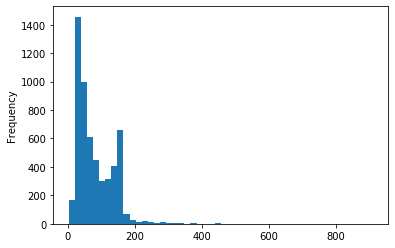

In [8]:
message['length'].plot(bins=50,kind='hist')

In [9]:
message.length.describe()

count    5572.000000
mean       80.368988
std        59.926946
min         2.000000
25%        35.750000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [10]:
message[message['length']==910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### Removing punctuation and using stop words to create vectors

In [11]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [12]:
message['Message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

### Matrix of token counts

In [13]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(message['Message'])
print(len(bow_transformer.vocabulary_))

11422


In [14]:
bow_transformer.vocabulary_

{'Go': 2058,
 'jurong': 7552,
 'point': 8914,
 'crazy': 5766,
 'Available': 1107,
 'bugis': 5215,
 'n': 8333,
 'great': 6934,
 'world': 11160,
 'la': 7665,
 'e': 6214,
 'buffet': 5214,
 'Cine': 1480,
 'got': 6903,
 'amore': 4651,
 'wat': 10962,
 'Ok': 3062,
 'lar': 7698,
 'Joking': 2449,
 'wif': 11069,
 'u': 10695,
 'oni': 8587,
 'Free': 1939,
 'entry': 6328,
 '2': 421,
 'wkly': 11120,
 'comp': 5616,
 'win': 11081,
 'FA': 1831,
 'Cup': 1548,
 'final': 6554,
 'tkts': 10509,
 '21st': 441,
 'May': 2802,
 '2005': 428,
 'Text': 3951,
 '87121': 868,
 'receive': 9249,
 'questionstd': 9156,
 'txt': 10683,
 'rateTCs': 9197,
 'apply': 4729,
 '08452810075over18s': 73,
 'U': 4066,
 'dun': 6201,
 'say': 9551,
 'early': 6219,
 'hor': 7183,
 'c': 5258,
 'already': 4627,
 'Nah': 2946,
 'dont': 6120,
 'think': 10430,
 'goes': 6874,
 'usf': 10796,
 'lives': 7839,
 'around': 4775,
 'though': 10447,
 'FreeMsg': 1941,
 'Hey': 2220,
 'darling': 5861,
 '3': 541,
 'weeks': 11008,
 'word': 11147,
 'back': 4890

In [15]:
# creating a data frame with count of elements
messages_bow = bow_transformer.transform(message['Message'])

In [16]:
messages_bow

<5572x11422 sparse matrix of type '<class 'numpy.int64'>'
	with 50500 stored elements in Compressed Sparse Row format>

In [17]:
sparsity =(100.0 * messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


In [18]:
#normalizing using tfidf score
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [19]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2835673688483853
8.527076498901426


In [20]:
messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11422)


In [21]:
print('Shape of Sparse Matrix: ',messages_bow.shape)
print('Amount of non-zero occurences:',messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11422)
Amount of non-zero occurences: 50500


In [22]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,message['Category'])

In [24]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [25]:
print(classification_report(message['Category'],all_predictions))
print(confusion_matrix(message['Category'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572

[[4825    0]
 [ 115  632]]


### Train Test Split

In [26]:
msg_train,msg_test,label_train,label_test = train_test_split(message['Message'],message['Category'],test_size=0.2)

In [27]:
print(len(msg_train),len(msg_test),len(label_train),len(label_test))

4457 1115 4457 1115


### Creating pipline

In [28]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [29]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FF07F205E8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [30]:
predictions = pipeline.predict(msg_test)

In [32]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [31]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1012
        spam       0.73      1.00      0.84       103

    accuracy                           0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.97      0.97      1115



#### Decision tree

In [38]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier()),
])
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       992
        spam       0.78      0.90      0.84       123

    accuracy                           0.96      1115
   macro avg       0.88      0.94      0.91      1115
weighted avg       0.96      0.96      0.96      1115



#### RandomForest

In [39]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier()),
])
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1001
        spam       0.79      0.98      0.88       114

    accuracy                           0.97      1115
   macro avg       0.89      0.98      0.93      1115
weighted avg       0.98      0.97      0.97      1115



#### KNN

In [40]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier()),
])
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.90      0.95      1080
        spam       0.25      1.00      0.40        35

    accuracy                           0.90      1115
   macro avg       0.62      0.95      0.67      1115
weighted avg       0.98      0.90      0.93      1115



#### Bagging Classifer

In [41]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',BaggingClassifier()),
])
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       992
        spam       0.79      0.91      0.85       123

    accuracy                           0.96      1115
   macro avg       0.89      0.94      0.91      1115
weighted avg       0.97      0.96      0.96      1115



#### Adaboost

In [42]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',AdaBoostClassifier()),
])
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       0.99      0.96      0.98      1004
        spam       0.73      0.94      0.82       111

    accuracy                           0.96      1115
   macro avg       0.86      0.95      0.90      1115
weighted avg       0.97      0.96      0.96      1115



### Thank You.